## APPENDIX A

### APPENDIX A.1 : Distributions of Scores for The BHOCS Data

In [5]:
from src.data.preprocessing.preprocess_sentiment import PreprocessSentiment
from src.feature_extraction.build_sentiment_features import BuildSentimentFeature
from src.data.make_dataset import MakeDataset

def extract_features(data_file, score_name='', score_range=None):
    # 1. Read Data
    make_dataset=MakeDataset()
    data = make_dataset.read_data(data_file)
    data['label']=data.sexist.apply(lambda x: 'sexist' if x == 1 else 'nonsexist')
    
    # 2. Preprocess
    preprocessed=PreprocessSentiment().transform(data.text)
    data['preprocessed_sent']=preprocessed
    
    # 3. Extract sentiment features
    features = BuildSentimentFeature().transform(preprocessed)
    data['negative score']=[feature[0] for feature in features]
    data['neutral score']=[feature[1] for feature in features]
    data['positive score']=[feature[2] for feature in features]
    data['compound score']=[feature[3] for feature in features]    
    return data

import seaborn as sns
sns.set_style("whitegrid")

def get_boxplot(df, score_name, score_range):
    ax=sns.boxplot(x="label", y=score_name, data=df, palette="Set1")
        
    ax.axes.set_title("bhocs data",fontsize=15)
    ax.set_xlabel("class",fontsize=20)
    ax.set_ylabel(score_name,fontsize=20)
    ax.tick_params(labelsize=15)
    ax.set_ylim(score_range[0], score_range[1])
    
def get_plots(df, score_name, score_range, binwidth=0.05):
    #Plot
    g=sns.displot(df, x=score_name, binrange=score_range, col="label", multiple="dodge", binwidth=binwidth)
    g.set_titles("{col_name} class")
    g.set_ylabels("Frequency")

In [6]:
data_file='/path/all_data_augmented.csv'
df=extract_features(data_file)

make_dataset=MakeDataset()
splits=make_dataset.prepare_data_splits(df, random_state=1)
X_train, y_train= make_dataset.get_data_split('BHOCS', splits, train=True, random_state=1)

,count,mean,std,min,25%,50%,75%,max,median,score name,filter
label,,,,,,,,,,,
nonsexist,840,0.11,0.44,-0.98,-0.13,0.0,0.48,0.96,0.0,compound,-
sexist,840,0.03,0.45,-0.94,-0.30,0.0,0.40,0.95,0.0,compound,-


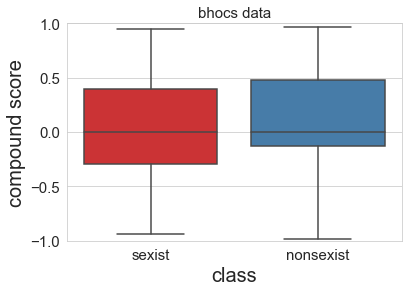

In [7]:
#compound score 

score_range=(-1, 1)

df_fil=X_train

score_name='compound score'
sc_name='compound'
filter_name='-'

#BoxPlot
df_fil=df_fil.sort_values(by=['label'], ascending=False)
get_boxplot(df_fil, score_name, score_range)

#Statistics
desc=df_fil.groupby(['label'])[score_name].describe()
desc['count']=desc['count'].astype('int32')
desc['median']=df_fil.groupby(['label'])[score_name].median().values
desc=desc.round(2)
desc['score name']=[sc_name, sc_name]
desc['filter']=[filter_name, filter_name]
desc

,count,mean,std,min,25%,50%,75%,max,median,score name,filter
label,,,,,,,,,,,
nonsexist,840,0.14,0.16,0.0,0.0,0.11,0.25,1.00,0.11,positive,-
sexist,840,0.12,0.14,0.0,0.0,0.10,0.22,0.75,0.10,positive,-


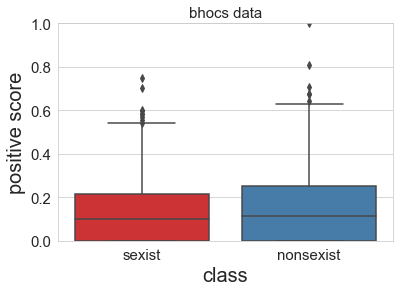

In [9]:
#positive score

score_range=(0, 1)

df_fil=X_train

score_name='positive score'
sc_name='positive'
filter_name='-'

#BoxPlot
df_fil=df_fil.sort_values(by=['label'], ascending=False)
get_boxplot(df_fil, score_name, score_range)

#Statistics
desc=df_fil.groupby(['label'])[score_name].describe()
desc['count']=desc['count'].astype('int32')
desc['median']=df_fil.groupby(['label'])[score_name].median().values
desc=desc.round(2)
desc['score name']=[sc_name, sc_name]
desc['filter']=[filter_name, filter_name]
desc

,count,mean,std,min,25%,50%,75%,max,median,score name,filter
label,,,,,,,,,,,
nonsexist,840,0.09,0.14,0.0,0.0,0.00,0.15,0.79,0.00,negative,-
sexist,840,0.11,0.13,0.0,0.0,0.06,0.19,0.84,0.06,negative,-


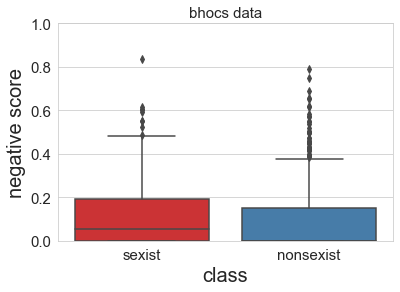

In [11]:
#negative score

score_range=(0, 1)

df_fil=X_train

score_name='negative score'
sc_name='negative'
filter_name='-'

#BoxPlot
df_fil=df_fil.sort_values(by=['label'], ascending=False)
get_boxplot(df_fil, score_name, score_range)

#Statistics
desc=df_fil.groupby(['label'])[score_name].describe()
desc['count']=desc['count'].astype('int32')
desc['median']=df_fil.groupby(['label'])[score_name].median().values
desc=desc.round(2)
desc['score name']=[sc_name, sc_name]
desc['filter']=[filter_name, filter_name]
desc

,count,mean,std,min,25%,50%,75%,max,median,score name,filter
label,,,,,,,,,,,
nonsexist,840,0.77,0.19,0.00,0.64,0.77,1.00,1.0,0.77,neutral,-
sexist,840,0.77,0.16,0.15,0.67,0.76,0.89,1.0,0.76,neutral,-


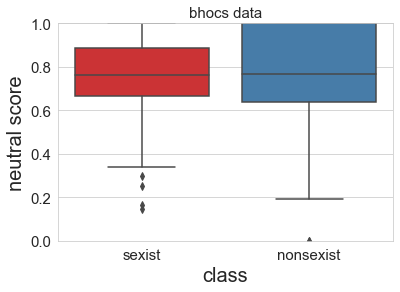

In [13]:
#neutral score

score_range=(0, 1)

df_fil=X_train

score_name='neutral score'
sc_name='neutral'
filter_name='-'

#BoxPlot
df_fil=df_fil.sort_values(by=['label'], ascending=False)
get_boxplot(df_fil, score_name, score_range)

#Statistics
desc=df_fil.groupby(['label'])[score_name].describe()
desc['count']=desc['count'].astype('int32')
desc['median']=df_fil.groupby(['label'])[score_name].median().values
desc=desc.round(2)
desc['score name']=[sc_name, sc_name]
desc['filter']=[filter_name, filter_name]
desc

### APPENDIX A.2 : Distributions of Filtered Scores for The BHOCS Data

,count,mean,std,min,25%,50%,75%,max,median,score name,filter
label,,,,,,,,,,,
nonsexist,626,0.15,0.51,-0.98,-0.30,0.32,0.57,0.96,0.32,compound,!= 0.0
sexist,626,0.05,0.50,-0.94,-0.39,0.08,0.46,0.95,0.08,compound,!= 0.0


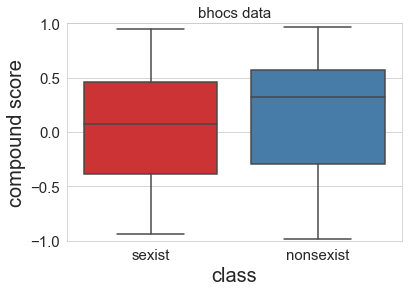

In [8]:
#compound score != 0.0

score_range=(-1, 1)

df_fil=X_train[X_train['compound score'] != 0.0]
df_fil=make_dataset.downsample(df_fil, 1)

score_name='compound score'
sc_name='compound'
filter_name='!= 0.0'

#BoxPlot
df_fil=df_fil.sort_values(by=['label'], ascending=False)
get_boxplot(df_fil, score_name, score_range)

#Statistics
desc=df_fil.groupby(['label'])[score_name].describe()
desc['count']=desc['count'].astype('int32')
desc['median']=df_fil.groupby(['label'])[score_name].median().values
desc=desc.round(2)
desc['score name']=[sc_name, sc_name]
desc['filter']=[filter_name, filter_name]
desc

,count,mean,std,min,25%,50%,75%,max,median,score name,filter
label,,,,,,,,,,,
nonsexist,401,0.28,0.13,0.11,0.18,0.25,0.34,1.00,0.25,positive,> 0.11
sexist,401,0.24,0.11,0.11,0.16,0.22,0.29,0.75,0.22,positive,> 0.11


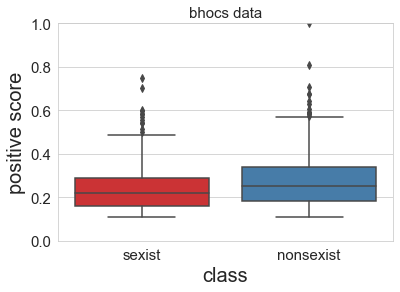

In [10]:
#positive score > 0.11

score_range=(0, 1)

df_fil=X_train[(X_train['positive score'] > 0.11)]
df_fil=make_dataset.downsample(df_fil, 1)

score_name='positive score'
sc_name='positive'
filter_name='> 0.11'

#BoxPlot
df_fil=df_fil.sort_values(by=['label'], ascending=False)
get_boxplot(df_fil, score_name, score_range)

#Statistics
desc=df_fil.groupby(['label'])[score_name].describe()
desc['count']=desc['count'].astype('int32')
desc['median']=df_fil.groupby(['label'])[score_name].median().values
desc=desc.round(2)
desc['score name']=[sc_name, sc_name]
desc['filter']=[filter_name, filter_name]
desc

,count,mean,std,min,25%,50%,75%,max,median,score name,filter
label,,,,,,,,,,,
nonsexist,317,0.23,0.13,0.06,0.13,0.20,0.30,0.79,0.20,negative,> 0.06
sexist,317,0.21,0.11,0.06,0.13,0.19,0.28,0.84,0.19,negative,> 0.06


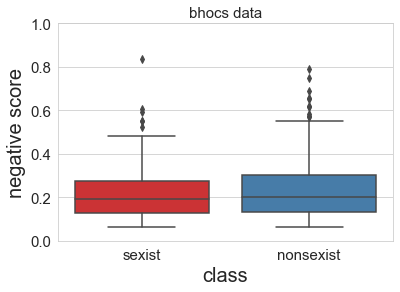

In [12]:
#negative score > 0.06

score_range=(0, 1)

df_fil=X_train[(X_train['negative score'] > 0.06)]
df_fil=make_dataset.downsample(df_fil, 1)

score_name='negative score'
sc_name='negative'
filter_name='> 0.06'

#BoxPlot
df_fil=df_fil.sort_values(by=['label'], ascending=False)
get_boxplot(df_fil, score_name, score_range)

#Statistics
desc=df_fil.groupby(['label'])[score_name].describe()
desc['count']=desc['count'].astype('int32')
desc['median']=df_fil.groupby(['label'])[score_name].median().values
desc=desc.round(2)
desc['score name']=[sc_name, sc_name]
desc['filter']=[filter_name, filter_name]
desc

,count,mean,std,min,25%,50%,75%,max,median,score name,filter
label,,,,,,,,,,,
nonsexist,409,0.61,0.12,0.00,0.55,0.63,0.71,0.76,0.63,neutral,< 0.76
sexist,409,0.64,0.10,0.15,0.59,0.66,0.72,0.76,0.66,neutral,< 0.76


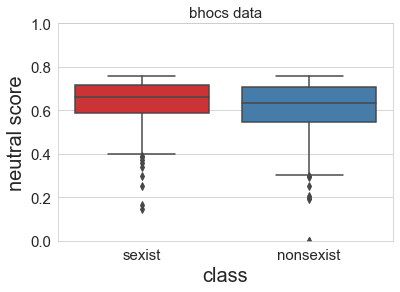

In [14]:
#neutral score < 0.76

score_range=(0, 1)

df_fil=X_train[(X_train['neutral score'] < 0.76)]
df_fil=make_dataset.downsample(df_fil, 1)

score_name='neutral score'
sc_name='neutral'
filter_name='< 0.76'

#BoxPlot
df_fil=df_fil.sort_values(by=['label'], ascending=False)
get_boxplot(df_fil, score_name, score_range)

#Statistics
desc=df_fil.groupby(['label'])[score_name].describe()
desc['count']=desc['count'].astype('int32')
desc['median']=df_fil.groupby(['label'])[score_name].median().values
desc=desc.round(2)
desc['score name']=[sc_name, sc_name]
desc['filter']=[filter_name, filter_name]
desc

## APPENDIX B : Classification performance of the Logit, CNN, and SVM.

Populating the interactive namespace from numpy and matplotlib


/Users/ezgidaldal/anaconda3/envs/t37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoid

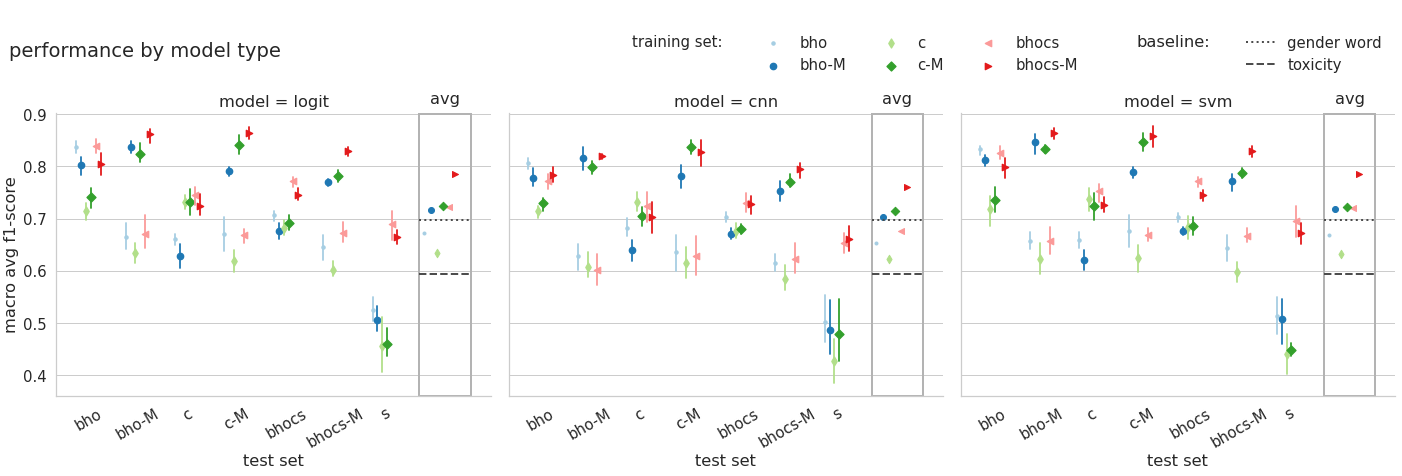

In [4]:
file_name1='../experiments/3_rq2_across_data_domains/results_rq2.pkl'

results_df1=[]
with open(file_name1, 'rb') as f:
    results_df1 = pickle.load(f)


# The code below is copied from this repository (https://github.com/gesiscss/sexist_code_icwsm20).
####################################################################
import pickle
import pandas as pd
import seaborn as sns

def format_domain_name(r):
    #{'bho', 'bho-M', 'bhocs', 'bhocs-M', 'c', 'c-M', 's'}
    r=r.lower()
    if r == 'bhom':
        return 'bho-M'
    elif r == 'bhocsm':
        return 'bhocs-M'
    elif r == 'cm':
        return 'c-M'
    else:
        return r

def format_model_name(name):
    if name == 'gender_word':
        return 'gender word'
    elif name == 'threshold_classifier':
        return 'toxicity'
    elif name == 'logistic_regression':
        return 'logit'
    else:
        return name

def format_columns(df):
    df['train_domain']=[format_domain_name(row['train_domain']) for index, row in df.iterrows()]
    df['test']=[format_domain_name(row['test_domain']) for index, row in df.iterrows()]
    df['model']=[format_model_name(row['model_name']) for index, row in df.iterrows()]
    df['variable']=['macro avg f1-score' for index, row in df.iterrows()]
    df['value']=df['macro avg f1-score']
    return df


df=results_df1

df=format_columns(df)
df=df[['model', 'test', 'train_domain', 'variable', 'value']]

gender_bline = df[df['model'] == 'gender word'].value.mean()
toxicity_bline = df[df['model'] == 'toxicity'].value.mean()
df=df[~df.model.isin(['toxicity', 'gender word',])]
df

%pylab inline

data_order = ['bho', 'bho-M', 'c', 'c-M', 'bhocs', 'bhocs-M']
model_order = ['logit', 'cnn', u'svm',]
marker_order = ['.','o', "d","D",  "<",">",]

custom_palette = sns.color_palette("Paired",8)
custom_palette[-1] = (.5, .5, .5)
custom_palette[-2] = (.6, .6, .6)

with plt.rc_context(dict(sns.axes_style("whitegrid"),
                         **sns.plotting_context("notebook", font_scale=1.35, 
                                                rc={"lines.linewidth": 1.,}
                                               ))):
    g = sns.catplot(x='test', y='value', col='model', hue='train_domain',  
                    data=df, kind='point',
                    sharex=True, sharey=True,
                    col_order = model_order,
                    hue_order = data_order,
                    order = data_order+['s'],
                    markers=marker_order,
                    legend=False,
                    legend_out=True,
                
                    palette=custom_palette,
                    dodge=.5,
                    join=False,
                    aspect=1.3
                   )
    g.set_xlabels("test set")
    for ax in g.axes[0]: 
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')
        plt.setp(ax.collections, sizes=[40])

    g.axes[0, 0].set_ylabel(u'macro avg f1-score')

    g.fig.suptitle('performance by model type', x=0, ha='left', y=1.1)
    l=g.axes[0, 2].legend(loc='upper right', bbox_to_anchor=(0.3, 1.4), ncol=3,
              fancybox=False, shadow=False, frameon=False)
    l.set_title('training set:')
    l.get_title().set_position((-240, -22))
    plt.setp(l.get_title(),fontsize=l.prop.get_size())

    clrs = dict(zip(data_order,
                   custom_palette, ))
    mrkrs = dict(zip(data_order,marker_order ))    
    pltn = {j: i for i, j in enumerate(model_order)}
    mdln = {j:i for i, j in enumerate(data_order)}
    import matplotlib.patches as patches
    for a, d in df.groupby(["train_domain","model"]).mean().reset_index().groupby("model"):
        for mdl, v in d.set_index('train_domain').value.to_dict().items():
            g.axes[0, pltn[a]].scatter([6.8+(mdln[mdl]/8.)], [d.set_index('train_domain').value.to_dict()[mdl]],
                                          c=clrs[mdl], marker=mrkrs[mdl], clip_on=True)
    for i in range(3):
        l1 = g.axes[0, i].plot((6.7, 7.75), 
                                    (gender_bline, gender_bline),
                                    ls=':', lw=2, c='.3', clip_on = True,
                                      )  

        l2 = g.axes[0, i].plot((6.7, 7.75), 
                                    (toxicity_bline, toxicity_bline),
                                    ls='--', lw=2, c='.3', clip_on = True, 
                                      )  

    for i in range(3):
        g.axes[0, i].add_patch( patches.Rectangle((6.7,g.axes[0, pltn[a]].get_ylim()[0]),
                                                        1.05,.9-g.axes[0, pltn[a]].get_ylim()[0],
                                                        linewidth=2,
                                                        edgecolor='.7',
                                                        facecolor='none',
                                                        clip_on=False))
        g.axes[0, i].text(6.7+1.05/2, .92, 'avg', ha='center')
        
    from matplotlib.lines import Line2D

    lss = [':', '--']
    lines = [Line2D([0], [0], color='.3', linewidth=2, linestyle=ll) for ll in lss]
    labels = ['gender word', 'toxicity',]
    ll=g.axes[0, i].legend(lines, labels, loc='upper right', bbox_to_anchor=(1., 1.4), ncol=1,
              fancybox=False, shadow=False, frameon=False)
    ll.set_title('baseline:')
    ll.get_title().set_position((-140, -22))
    plt.setp(l.get_title(),fontsize=l.prop.get_size())
    g.axes[0, i].add_artist(l)
